In [1]:
# Import the necessary packages and libraries #
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import numpy.matlib
import pandas 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow
from tensorflow import keras 
import os
from sklearn.neighbors import DistanceMetric

In [2]:
# Sets the precision of the data in the Pandas Dataframes 

pandas.set_option("precision", 10)

In [3]:
# Removes any Tensorflow warnings 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Import the MatLab data #

matlabData = sio.loadmat(file_name='./data/s2_sl2p_uniform_10_replicates_sobol_prosail_inout.mat', variable_names=['Input', 'Output'])

In [5]:
# Extract the input and output data #

bands = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
angles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

In [6]:
# Standardize the calibration data #

cal_data = pandas.concat([bands, angles, LAI, FAPAR, FCOVER], axis=1, join='outer')

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257


In [7]:
# Standardize the calibration data #

cal_data_scaled = pandas.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(cal_data))

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430


In [8]:
# Create subset id's #

rep = 10

subsets = numpy.arange(0, int(cal_data_scaled.shape[0]/10))

subset_ids = numpy.matlib.repmat(subsets, 1, rep)

cal_data_scaled['subset_id'] = subset_ids[0]

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286


In [9]:
# Sample data to create reference database # 

ref_data = cal_data_scaled.sample(n=100, ignore_index=False)

ref_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
84859,-1.0519918659,-0.5745075943,-1.1807157350,0.2805741516,0.9846101112,0.8817019905,0.2540734323,-0.4894037607,-0.3947547719,-2.0748835016,-0.7084867317,0.5222329679,0.8853536337,0.8500309178,11131
82313,0.3474494610,-0.5306143241,0.3291311926,1.1900721516,1.2644978235,1.2950522883,0.8563721484,0.0858941910,0.3341863156,0.0850417335,-0.9916172832,0.5222329679,0.8252063605,0.8349175930,8585
95752,-1.3663860722,-0.8021815875,-1.4476190361,-1.5155552271,-0.9786537148,-0.7765140440,-0.4841936445,-0.1533982467,-0.8843184902,0.7531066888,1.2441789176,0.8703882798,-0.0653809325,-0.1592308862,9736
115311,0.2243036547,-0.7521297444,0.0708149381,0.1549271415,0.0896876764,0.0051509103,-0.9064758504,-0.9684754136,0.0883117803,0.9439931263,-1.3125530522,1.5666989036,0.7251060572,0.7226697423,4719
30775,0.7920852486,0.0130395956,0.8562905734,1.0830891987,0.7828633948,0.8504181939,1.9524245964,1.3482171430,0.4470339156,0.0871299261,-0.9893500268,-0.8703882798,0.3563272756,0.4172044141,6199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44722,-0.9619453586,0.2857869112,-0.8769482700,-1.1395789536,-0.9488775346,-1.0062679111,-0.6986087488,0.0944824846,1.1897521820,-0.1448422290,0.7105550091,-0.5222329679,-0.5547031347,-0.6576644949,7858
58357,-0.3556040998,-0.5526719944,-0.3677696403,-0.1400644221,-0.1964932756,-0.1788601182,-0.4747950626,-0.6746004231,-1.5211911788,-1.2812062888,0.7928335729,-0.1740776560,0.4188947335,0.4115066718,9205
117661,0.0746951197,-0.5967208674,-0.0306329266,-0.6774435973,-0.8522440327,-0.8080753422,-1.2627021080,-1.0518100506,0.7361739216,0.6934129365,-1.1918853997,1.5666989036,0.4144192718,0.4299285319,7069
41266,-0.7590411986,-0.2575738721,-0.6967023924,-0.1773930314,0.2281094333,0.3501378975,0.8382155712,0.6981605503,0.3831500900,-2.0280097963,-0.7107497138,-0.5222329679,0.1337306233,0.0799919406,4402


In [10]:
# List of indices to remove from the calibration database #

index_list = ref_data.index.values

In [11]:
# Resets the indices in the reference data so that they start from zero

ref_data = ref_data.reset_index(drop=True)

In [12]:
# Removes the indices from calibration database that are in the reference database #

cal_data_scaled = cal_data_scaled.drop(index_list)

In [13]:
# Resets the indices in the calibration data so that they start from zero

cal_data_scaled = cal_data_scaled.reset_index(drop=True)

In [14]:
# Creates the training and validation sets from the calibration data

features_training, features_valid = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [15]:
# Resets the indices in the training data so that they start from zero

features_training = features_training.reset_index(drop=True)

In [16]:
# Resets the indices in the validation data so that they start from zero

features_valid = features_valid.reset_index(drop=True)

In [17]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_feature_training = features_training['LAI']
FAPAR_feature_training = features_training['FAPAR']
FCOVER_feature_training = features_training['FCOVER']

In [18]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_feature_valid = features_valid['LAI']
FAPAR_feature_valid = features_valid['FAPAR']
FCOVER_feature_valid = features_valid['FCOVER']

In [19]:
# Removes that isn't needed for training and validation 
features_training = features_training.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)
features_valid = features_valid.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)

In [20]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAI_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAI_feature_model = LAI_feature_model.fit(features_training, LAI_feature_training)

FAPAR_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPAR_feature_model = FAPAR_feature_model.fit(features_training, FAPAR_feature_training)

FCOVER_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=3)
FCOVER_feature_model = FCOVER_feature_model.fit(features_training, FCOVER_feature_training)

In [21]:
# Makes predictions on the validation data using the LARS models

LAI_feature_predicted = pandas.Series(LAI_feature_model.predict(features_valid))
FAPAR_feature_predicted = pandas.Series(FAPAR_feature_model.predict(features_valid))
FCOVER_feature_predicted = pandas.Series(FCOVER_feature_model.predict(features_valid))

In [22]:
# Extracts the features from the LARS Model

LAI_features = numpy.nonzero(LAI_feature_model.coef_)[0]
FAPAR_features = numpy.nonzero(FAPAR_feature_model.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVER_feature_model.coef_)[0]

LAI_features = features_valid.columns[LAI_features]
print(LAI_features)
FAPAR_features = features_valid.columns[FAPAR_features]
print(FAPAR_features)
FCOVER_features = features_valid.columns[FCOVER_features]
print(FCOVER_features)

Index(['B1', 'B5', 'B6', 'B7'], dtype='object')
Index(['B1', 'B2', 'B5', 'B7'], dtype='object')
Index(['B1', 'B5', 'B7'], dtype='object')


In [23]:
# Creates arrays containing the calibration and reference data 

ref_array = numpy.array(ref_data[LAI_features])

cal_array = numpy.array(cal_data_scaled[LAI_features])

In [24]:
# Calls function from sci-kit learn for calculating the euclidean distance 

dist = DistanceMetric.get_metric('euclidean')

In [25]:
# Calculates the probability for each sample in the calibration data

probs = numpy.exp(-numpy.amin(dist.pairwise(cal_array,ref_array),1))

In [26]:
# Initialize the probability column in the calibration database #

cal_data_scaled['prob'] = probs 

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [27]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.5283955760
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.5981119168
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.4758119770
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.7354463974
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.3607256343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.7378199829
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.7502578145
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.7343530231
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.8005730405


In [28]:
# Function to normalize the probabilities 

def normalize(data):
    sum_prob = sum(data['prob'])
    data['prob'] = data['prob']/sum_prob
    return data

In [29]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000063696
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000072100
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000057358
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000088656
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000043484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000088942
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000090441
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000088524
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000096506


In [30]:
# Initialize the probability column in the calibration database #

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [31]:
# Assign max probability in each subset to every member of that subset 

cal_data_scaled['prob'] = cal_data_scaled.groupby('subset_id')['prob'].transform('max')

In [32]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000064822
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000080227
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000066960
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000078879
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000083390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000074628
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000078905
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000082672
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000082524


In [33]:
# Find median probability 

median_prob = numpy.median(cal_data_scaled['prob'])

print(median_prob)

8.272422191513493e-06


In [34]:
# Set weight that are below the median to zero 

cal_data_scaled['prob'] = cal_data_scaled['prob'].where(cal_data_scaled['prob'] > median_prob, 0.0)

In [35]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000000000
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000000000
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000000000
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000000000
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000083390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000000000
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000000000
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000000000
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000000000


In [36]:
# Creates the training and validation sets from the calibration data

training_data, valid_data = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [37]:
# Resets the indices in the training data so that they start from zero

training_data = training_data.reset_index(drop=True)

In [38]:
# Resets the indices in the validation data so that they start from zero

valid_data = valid_data.reset_index(drop=True)

In [39]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_training = training_data['LAI']
FAPAR_training = training_data['FAPAR']
FCOVER_training = training_data['FCOVER']

In [40]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_valid = valid_data['LAI']
FAPAR_valid = valid_data['FAPAR']
FCOVER_valid = valid_data['FCOVER']

In [41]:
# Extracts the probabilites for training and validation 

training_weights = numpy.array(training_data['prob'])
valid_weights = numpy.array(valid_data['prob'])

In [42]:
# Removes that isn't needed for training and validation 
# Explicitly subset the inputs
training_data = training_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)
valid_data = valid_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)

In [43]:
LAI_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FAPAR_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FCOVER_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [44]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [45]:
# Runs NN Model for LAI

LAI_history = LAI_model.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            sample_weight = training_weights,
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid), valid_weights),
                            callbacks=[LAI_callback]
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 17s 201us/sample - loss: 1.6498e-06 - mse: 0.4088 - mae: 0.4957 - val_loss: 9.2787e-07 - val_mse: 0.2289 - val_mae: 0.3752
Epoch 2/120
85946/85946 [==============================] - 13s 149us/sample - loss: 8.1636e-07 - mse: 0.1974 - mae: 0.3476 - val_loss: 7.3304e-07 - val_mse: 0.1760 - val_mae: 0.3287
Epoch 3/120
85946/85946 [==============================] - 10s 116us/sample - loss: 6.9530e-07 - mse: 0.1655 - mae: 0.3182 - val_loss: 6.4717e-07 - val_mse: 0.1552 - val_mae: 0.3069
Epoch 4/120
85946/85946 [==============================] - 10s 116us/sample - loss: 6.3102e-07 - mse: 0.1512 - mae: 0.3033 - val_loss: 5.9726e-07 - val_mse: 0.1476 - val_mae: 0.2974
Epoch 5/120
85946/85946 [==============================] - 10s 116us/sample - loss: 5.8530e-07 - mse: 0.1421 - mae: 0.2924 - val_loss: 5.5621e-07 - val_mse: 0.1360 - val_mae: 0.2849
Epoch 6/120
85946/85946 [===============

In [46]:
# Runs NN Model for FAPAR

FAPAR_history = FAPAR_model.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                sample_weight = training_weights,
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid), valid_weights),
                                callbacks=[FAPAR_callback]
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 15s 171us/sample - loss: 5.2260e-07 - mse: 0.1345 - mae: 0.2407 - val_loss: 2.1822e-07 - val_mse: 0.0569 - val_mae: 0.1708
Epoch 2/20
85946/85946 [==============================] - 12s 134us/sample - loss: 1.9262e-07 - mse: 0.0496 - mae: 0.1591 - val_loss: 1.6932e-07 - val_mse: 0.0442 - val_mae: 0.1494
Epoch 3/20
85946/85946 [==============================] - 12s 136us/sample - loss: 1.5249e-07 - mse: 0.0386 - mae: 0.1412 - val_loss: 1.4322e-07 - val_mse: 0.0344 - val_mae: 0.1328
Epoch 4/20
85946/85946 [==============================] - 12s 139us/sample - loss: 1.2742e-07 - mse: 0.0321 - mae: 0.1299 - val_loss: 1.1786e-07 - val_mse: 0.0303 - val_mae: 0.1256
Epoch 5/20
85946/85946 [==============================] - 12s 137us/sample - loss: 1.0961e-07 - mse: 0.0278 - mae: 0.1206 - val_loss: 1.0268e-07 - val_mse: 0.0260 - val_mae: 0.1165
Epoch 6/20
85946/85946 [=====================

In [47]:
# Runs NN Model for FCOVER

FCOVER_history = FCOVER_model.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  sample_weight = training_weights,
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid), valid_weights),
                                  callbacks=[FCOVER_callback]
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 13s 151us/sample - loss: 2.9199e-07 - mse: 0.0804 - mae: 0.1972 - val_loss: 1.5861e-07 - val_mse: 0.0403 - val_mae: 0.1477
Epoch 2/20
85946/85946 [==============================] - 11s 122us/sample - loss: 1.3754e-07 - mse: 0.0353 - mae: 0.1380 - val_loss: 1.1769e-07 - val_mse: 0.0289 - val_mae: 0.1258
Epoch 3/20
85946/85946 [==============================] - 11s 123us/sample - loss: 1.0290e-07 - mse: 0.0260 - mae: 0.1199 - val_loss: 9.2434e-08 - val_mse: 0.0241 - val_mae: 0.1155
Epoch 4/20
85946/85946 [==============================] - 11s 124us/sample - loss: 8.5176e-08 - mse: 0.0218 - mae: 0.1102 - val_loss: 8.1235e-08 - val_mse: 0.0205 - val_mae: 0.1062
Epoch 5/20
85946/85946 [==============================] - 11s 126us/sample - loss: 7.7030e-08 - mse: 0.0199 - mae: 0.1045 - val_loss: 7.5047e-08 - val_mse: 0.0191 - val_mae: 0.1019
Epoch 6/20
85946/85946 [=====================

In [48]:
# These are all plots for the RMSE of the NN as training was run

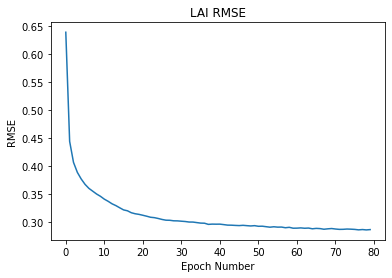

In [49]:
LAI_rmse = plt.plot(numpy.sqrt(LAI_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("LAI RMSE")
plt.show()

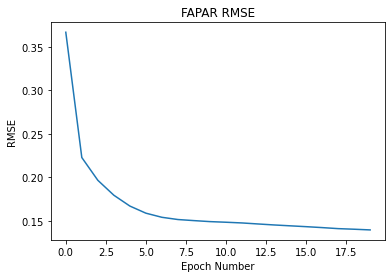

In [50]:
FAPAR_rmse = plt.plot(numpy.sqrt(FAPAR_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FAPAR RMSE")
plt.show()

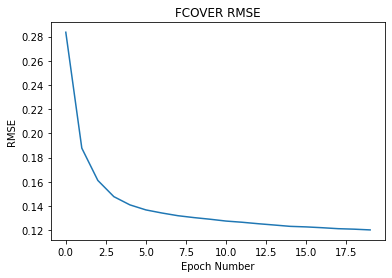

In [51]:
FCOVER_rmse = plt.plot(numpy.sqrt(FCOVER_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FCOVER RMSE")
plt.show()

In [52]:
# Makes predictions on the validation data using the 

LAI_predictions = pandas.Series(LAI_model.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions = pandas.Series(FAPAR_model.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions = pandas.Series(FCOVER_model.predict(numpy.array(valid_data)).flatten())

In [53]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAImodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAImodel = LAImodel.fit(training_data, LAI_training)

FAPARmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPARmodel = FAPARmodel.fit(training_data, FAPAR_training)

FCOVERmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVERmodel = FCOVERmodel.fit(training_data, FCOVER_training)

In [54]:
# Makes predictions on the validation data using the LARS models

LAI_predicted = pandas.Series(LAImodel.predict(valid_data))
FAPAR_predicted = pandas.Series(FAPARmodel.predict(valid_data))
FCOVER_predicted = pandas.Series(FCOVERmodel.predict(valid_data))

In [55]:
# Function that creates the density plots 

def plotting_function(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax = ax
    input_var = input_var*cal_data[var].std() + cal_data[var].mean()
    resp_var = resp_var*cal_data[var].std() + cal_data[var].mean()
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x = input_var[idx]
    y = resp_var[idx]
    z = z[idx]
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    plt.colorbar(mappable=ax.scatter(x, y, c = z), ax=ax)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

Text(0.5, 0.98, 'LARS Regression')

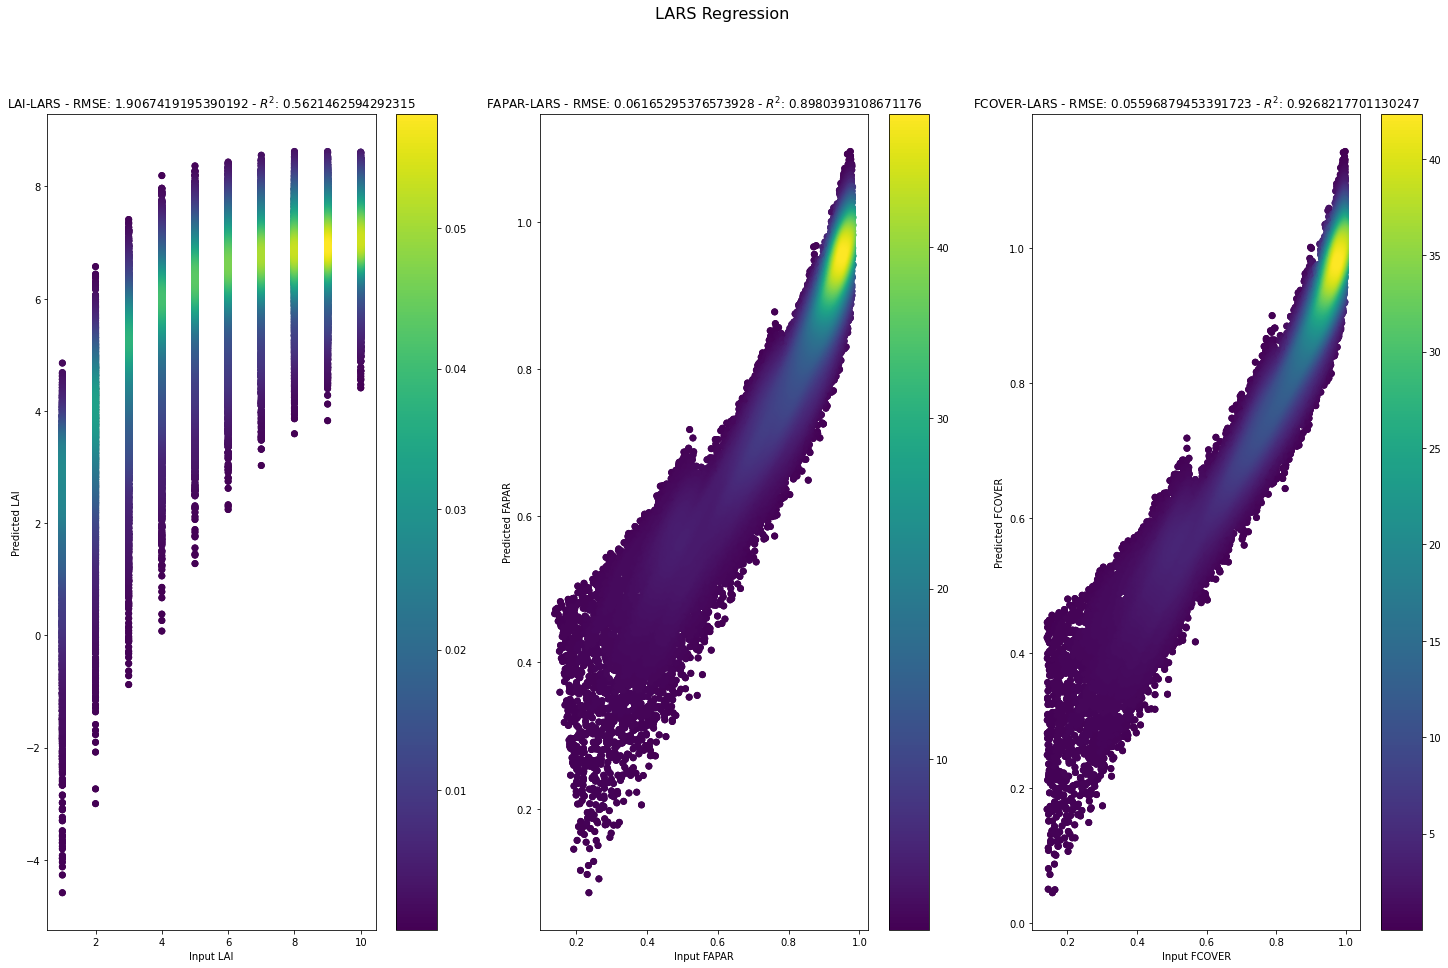

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI',LAI_valid, LAI_predicted, 'LAI','Input LAI','Predicted LAI','LARS', ax1)
  
plotting_function('FAPAR',FAPAR_valid, FAPAR_predicted, 'FAPAR','Input FAPAR','Predicted FAPAR','LARS', ax2)

plotting_function('FCOVER',FCOVER_valid, FCOVER_predicted, 'FCOVER','Input FCOVER','Predicted FCOVER','LARS', ax3)

fig.suptitle('LARS Regression', fontsize=16)

Text(0.5, 0.98, 'Neural Network - with weights')

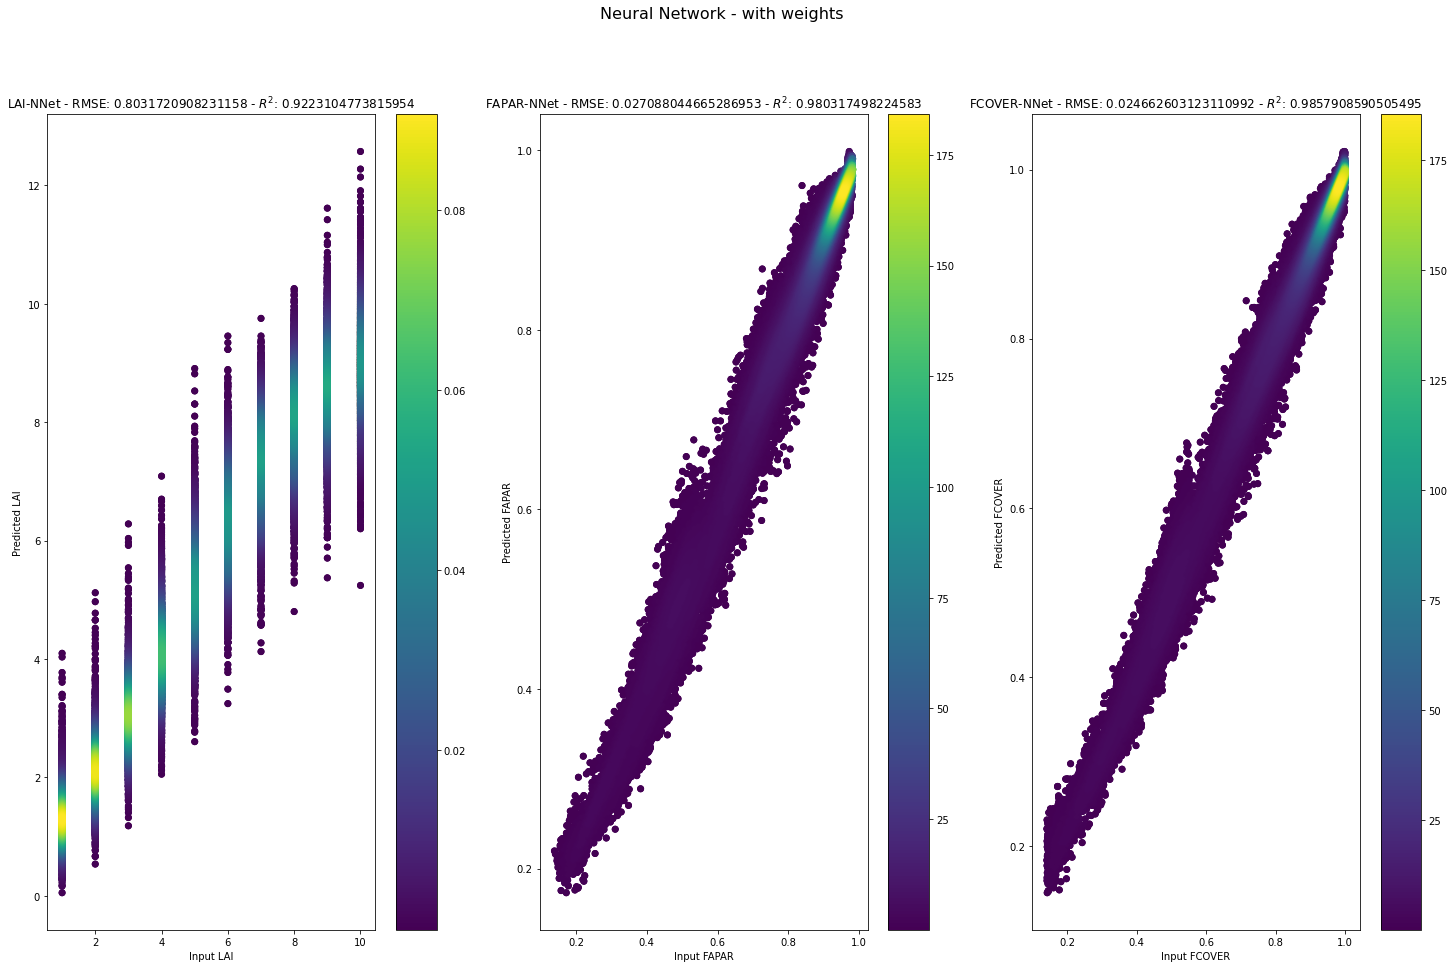

In [57]:
fig, (ax4, ax5, ax6) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet',ax4)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax5)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax6)

fig.suptitle('Neural Network - with weights', fontsize=16)

In [58]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [59]:
# Runs NN Model for LAI

LAI_history_no_weights = LAI_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid)) 
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 14s 160us/sample - loss: 0.3984 - mse: 0.3984 - mae: 0.5019 - val_loss: 0.2150 - val_mse: 0.2150 - val_mae: 0.3621
Epoch 2/120
85946/85946 [==============================] - 12s 138us/sample - loss: 0.1742 - mse: 0.1742 - mae: 0.3258 - val_loss: 0.1514 - val_mse: 0.1514 - val_mae: 0.3040
Epoch 3/120
85946/85946 [==============================] - 10s 122us/sample - loss: 0.1421 - mse: 0.1421 - mae: 0.2925 - val_loss: 0.1356 - val_mse: 0.1356 - val_mae: 0.2853
Epoch 4/120
85946/85946 [==============================] - 10s 122us/sample - loss: 0.1295 - mse: 0.1295 - mae: 0.2772 - val_loss: 0.1260 - val_mse: 0.1260 - val_mae: 0.2724
Epoch 5/120
85946/85946 [==============================] - 11s 124us/sample - loss: 0.1227 - mse: 0.1227 - mae: 0.2698 - val_loss: 0.1218 - val_mse: 0.1218 - val_mae: 0.2681
Epoch 6/120
85946/85946 [==============================] - 11s 124us/sample - lo

In [60]:
# Runs NN Model for FAPAR

FAPAR_history_no_weights = FAPAR_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid))
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 11s 134us/sample - loss: 0.0775 - mse: 0.0775 - mae: 0.1832 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1307
Epoch 2/20
85946/85946 [==============================] - 10s 111us/sample - loss: 0.0257 - mse: 0.0257 - mae: 0.1172 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1082
Epoch 3/20
85946/85946 [==============================] - 10s 111us/sample - loss: 0.0210 - mse: 0.0210 - mae: 0.1044 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.1015
Epoch 4/20
85946/85946 [==============================] - 10s 111us/sample - loss: 0.0189 - mse: 0.0189 - mae: 0.0983 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0970
Epoch 5/20
85946/85946 [==============================] - 10s 111us/sample - loss: 0.0178 - mse: 0.0178 - mae: 0.0946 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0936
Epoch 6/20
85946/85946 [==============================] - 10s 114us/sample - loss: 0.

In [61]:
# Runs NN Model for FCOVER

FCOVER_history_no_weights = FCOVER_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid))
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 13s 147us/sample - loss: 0.0556 - mse: 0.0556 - mae: 0.1625 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.1196
Epoch 2/20
85946/85946 [==============================] - 10s 121us/sample - loss: 0.0213 - mse: 0.0213 - mae: 0.1062 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.0958
Epoch 3/20
85946/85946 [==============================] - 11s 123us/sample - loss: 0.0159 - mse: 0.0159 - mae: 0.0905 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.0868
Epoch 4/20
85946/85946 [==============================] - 11s 123us/sample - loss: 0.0139 - mse: 0.0139 - mae: 0.0840 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0830
Epoch 5/20
85946/85946 [==============================] - 11s 124us/sample - loss: 0.0130 - mse: 0.0130 - mae: 0.0812 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0793
Epoch 6/20
85946/85946 [==============================] - 11s 131us/sample - loss: 0.

In [62]:
# Makes predictions on the validation data using the 

LAI_predictions_no_weights = pandas.Series(LAI_model_no_weights.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions_no_weights = pandas.Series(FAPAR_model_no_weights.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions_no_weights = pandas.Series(FCOVER_model_no_weights.predict(numpy.array(valid_data)).flatten())

Text(0.5, 0.98, 'Neural Network - without weights')

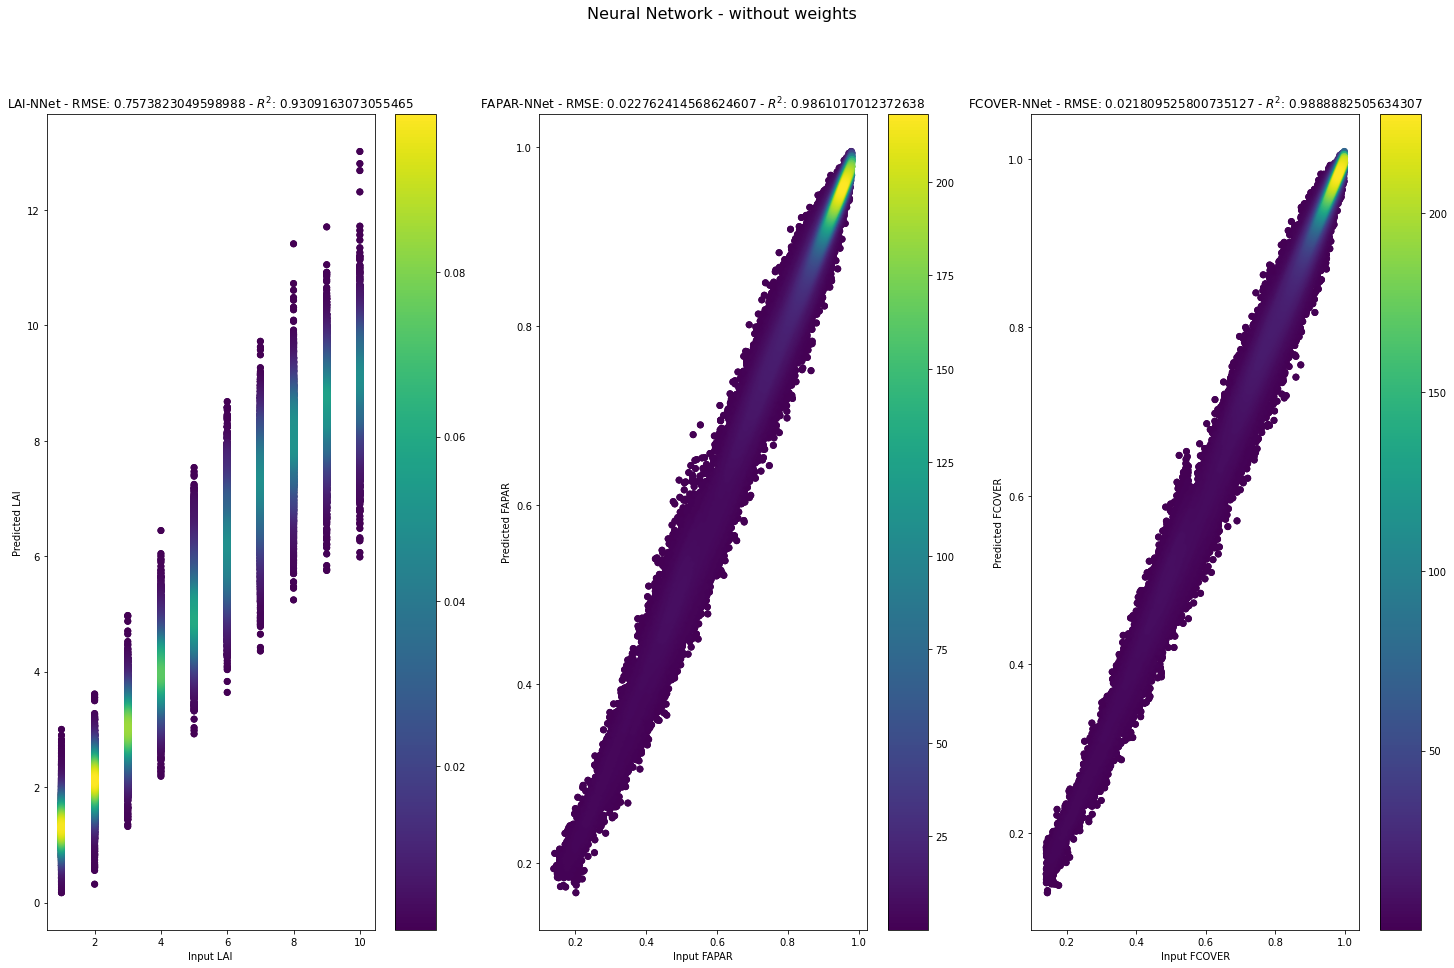

In [63]:
fig, (ax7, ax8, ax9) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions_no_weights, 'LAI','Input LAI','Predicted LAI','NNet',ax7)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions_no_weights, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax8)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions_no_weights, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax9)

fig.suptitle('Neural Network - without weights', fontsize=16)